In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm


In [4]:
df = pd.read_table('peptide-detail-ci_filtered_aligned.tsv')
print(len(df))
print(df.columns)
df.head(5)

123622
Index(['CDR3', 'CDR3_al'], dtype='object')


,CDR3,CDR3_al
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF
2,CALKVGADTQYF,CALKV--------GADTQYF
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF


In [10]:
from deepchem.feat.smiles_tokenizer import SmilesTokenizer
import os
df.loc[0, 'tokenized_smiles'] = ""
tokenizer = SmilesTokenizer("./vocab.txt")
for i in tqdm(df.index):
    df.loc[i,"tokenized_smiles"] = list(tokenizer.encode(str(df.loc[i,"CDR3_al"])))

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


  0%|          | 0/123622 [00:00<?, ?it/s]

In [20]:
df2 = pd.read_table('peptide-detail-ci.csv', sep=',')
for i in tqdm(df2.index):
    sequence = df2.loc[i,"TCR BioIdentity"].split("+")
    df2.loc[i, "CDR3"] = sequence[0]
    df2.loc[i, "v_gene"] = sequence[1]
    df2.loc[i, "j_gene"] = sequence[2]


  0%|          | 0/154320 [00:00<?, ?it/s]

In [43]:
df3 = pd.merge(df, df2, how="inner", left_on="CDR3", right_on="CDR3")
df3.to_csv("peptide-detail-ci_filtered_aligned_merged.csv", index=False)

In [2]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')

In [3]:
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL


In [4]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q","R", "S", "T", "V", "W", "Y", "-"]

# integer encode
label_encoder = LabelEncoder()
y_encoder =LabelEncoder()
y_encoder = y_encoder.fit(df['Amino Acids'].unique())
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = label_encoder.fit_transform(aa)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)


In [5]:
col_one_hot = []
col_integer = []
y_labels = []
for k in tqdm(df.index):
    integer_encoded = label_encoder.transform(list(df.loc[k,"CDR3_al"]))
    col_integer.append(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.transform(integer_encoded)
    col_one_hot.append(onehot_encoded)
    y_label = y_encoder.transform([df.loc[k,"Amino Acids"]])
    y_labels.append(y_label)
    

  0%|          | 0/236345 [00:00<?, ?it/s]

In [7]:
y_labels = [int(y) for y in y_labels]


In [6]:
df["CDR3_al_one_hot"] = col_one_hot
df["CDR3_al_integer"] = col_integer
df["label"] = y_labels

In [110]:
df.to_csv("peptide-detail-ci_filtered_aligned_encoded.csv", index=False)

In [112]:
df.drop(columns=["CDR3_al_one_hot"], inplace=True)
df.to_csv("peptide-detail-ci_filtered_aligned_encoded_int.csv", index=False)

In [8]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_encoded_int.csv')

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [237]:
df = df.sample(frac=1).reset_index(drop=True)
values = np.stack(df["CDR3_al_integer"].to_numpy())
X_train = tf.constant(values)
n_inputs = 20
print(len(X_train))
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=1)

236345
Epoch 1/10
14772/14772 [==============================] - 22s 1ms/step - loss: 12.4874
Epoch 2/10
14772/14772 [==============================] - 21s 1ms/step - loss: 9.9650: 2s - loss
Epoch 3/10
14772/14772 [==============================] - 20s 1ms/step - loss: 9.5258
Epoch 4/10
14772/14772 [==============================] - 20s 1ms/step - loss: 9.3153: 0s - loss:
Epoch 5/10
14772/14772 [==============================] - 20s 1ms/step - loss: 9.1127
Epoch 6/10
14772/14772 [==============================] - 20s 1ms/step - loss: 8.9484: 1s - loss:
Epoch 7/10
14772/14772 [==============================] - 19s 1ms/step - loss: 8.8577
Epoch 8/10
14772/14772 [==============================] - 21s 1ms/step - loss: 8.7919
Epoch 9/10
14772/14772 [==============================] - 20s 1ms/step - loss: 8.7411
Epoch 10/10
14772/14772 [==============================] - 20s 1ms/step - loss: 8.6868


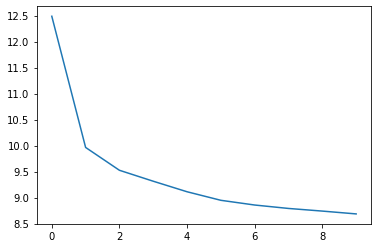

In [238]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')

In [239]:
encoder = Model(inputs=visible, outputs=bottleneck)

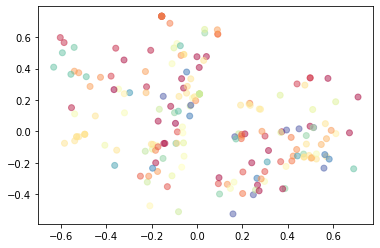

In [240]:
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["label"].nunique())
N = 200
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['label_color'][:N], alpha=0.5)
plt.show()

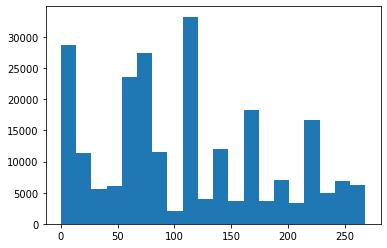

In [241]:
plt.hist(df["label"], bins=20)
plt.show()